공부 시간, 과외 시간과 성적 사이의 관계는 좌표로 나타낼 때 형태가 직선으로 해결되는 선형 회귀를 사용하기에 적합했었다.  
공부 시간에 따른 점수가 아닌 합격 여부 발표되는 시험이 있을 경우 직선으로 해결하기에는 적합하지 못한 문제가 발생된다.  
이럴 때, 사용하는 로지스틱 회귀는 참과 거짓 중에 하나를 내놓는 과정으로 참과 거짓을 구분한 'S'자를 눕혀놓은 형태의 선을 그어주는 작업이다.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


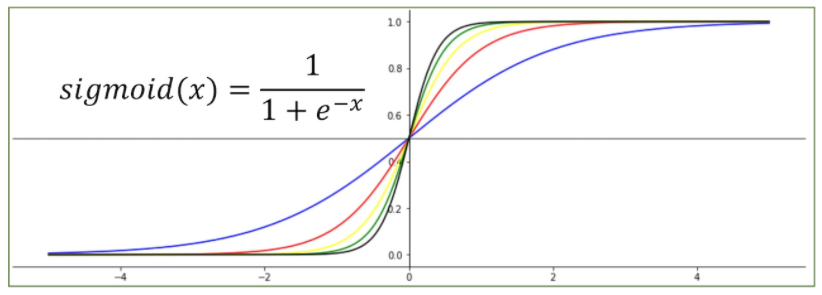

In [2]:
from IPython.display import Image
Image('./numpyImage/sigmoid.png', width=800)

참조 사이트  
http://taewan.kim/post/sigmoid_diff/  
https://devlog.jwgo.kr/2018/04/16/sigmoid-graph-according-to-slope-change/

In [3]:
# 공부 시간(x), 합격 여부(y) => [공부 시간, 합격 여부]
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]
xData = [i[0] for i in data] # 공부 시간
yData = [i[1] for i in data] # 합격 여부

In [4]:
# 기울기(a), y절편(b) 값을 랜덤한 값으로 정한다.
# random_uniform(): tensorflow에서 균등 분포를 따르는 난수를 발생시킨다.
# random_normal(): tensorflow에서 정규 분포를 따르는 난수를 발생시킨다.
a = tf.Variable(tf.random_normal([1], dtype=tf.float64))
b = tf.Variable(tf.random_normal([1], dtype=tf.float64))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print('a: {}, b: {}'.format(sess.run(a), sess.run(b)))

a: [0.03162621], b: [0.80971821]


시그모이드 방정식

In [5]:
# np.e: 넘파이에서 지수 값(2.718281828459045)을 의미하는 상수
# print(np.e)
# https://icim.nims.re.kr/post/easyMath/64 참조
y = 1 / (1 + np.e ** -(a * xData + b))

시그모이드 방정식의 오차를 계산하는 함수를 만든다.  
시그모이드 함수의 특성은 예측값(y)이 항상 0 아니면 1이다.

In [6]:
loss = -tf.reduce_mean(np.array(yData) * tf.log(y) + (1 - np.array(yData)) * tf.log(1 - y))

오차를 최소로 하는 값을 찾는다.

In [14]:
gradient_descent = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

학습 시킨다.

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(300001):
    sess.run(gradient_descent)
    if i % 10000 == 0:
        # Epoch, 오차, 기울기, y절편
        print('Epoch: {0:6d}, loss: {1:8.4f}, 기울기: {2:8.4f}, y절편: {3:8.4f}'.format(i, sess.run(loss), sess.run(a)[0],
                                                                                  sess.run(b)[0]))

Epoch:      0, loss:   3.6657, 기울기:  -0.6390, y절편:   0.7896
Epoch:  10000, loss:   0.0372, 기울기:   2.0066, y절편: -13.8802
Epoch:  20000, loss:   0.0218, 기울기:   2.5531, y절편: -17.7175
Epoch:  30000, loss:   0.0154, 기울기:   2.9085, y절편: -20.2097
Epoch:  40000, loss:   0.0119, 기울기:   3.1726, y절편: -22.0606
Epoch:  50000, loss:   0.0096, 기울기:   3.3826, y절편: -23.5324
Epoch:  60000, loss:   0.0081, 기울기:   3.5570, y절편: -24.7536
Epoch:  70000, loss:   0.0070, 기울기:   3.7059, y절편: -25.7968
Epoch:  80000, loss:   0.0062, 기울기:   3.8359, y절편: -26.7069
Epoch:  90000, loss:   0.0055, 기울기:   3.9511, y절편: -27.5140
Epoch: 100000, loss:   0.0050, 기울기:   4.0546, y절편: -28.2389
Epoch: 110000, loss:   0.0045, 기울기:   4.1486, y절편: -28.8967
Epoch: 120000, loss:   0.0042, 기울기:   4.2345, y절편: -29.4987
Epoch: 130000, loss:   0.0038, 기울기:   4.3138, y절편: -30.0536
Epoch: 140000, loss:   0.0036, 기울기:   4.3873, y절편: -30.5681
Epoch: 150000, loss:   0.0033, 기울기:   4.4558, y절편: -31.0479
Epoch: 160000, loss:   0.0031, 기울기:   4.